# **Attempt: GOT IT!**
# Imports and Configuration

In [1]:
# !pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, time, timedelta  # Added timedelta here
import pytz
import matplotlib.pyplot as plt
%matplotlib inline

# Strategy Configuration
SYMBOL = 'TSLA'
TOTAL_USD_AMOUNT = 25000
TRAILING_STOP_PERCENT = 0.002  # 0.2%


# Trading window (Eastern Time)
MARKET_START = time(hour=9, minute=31)
MARKET_STOP = time(hour=15, minute=45)
eastern_tz = pytz.timezone('US/Eastern')

def in_trading_window(timestamp):
    """Checks if timestamp is Eastern Time and within trading window"""
    if timestamp.tz != eastern_tz:
        timestamp = timestamp.tz_convert(eastern_tz)
    t = timestamp.time()
    return MARKET_START <= t <= MARKET_STOP

# Fetching Market Data

In [11]:
# Second cell - Download recent data
def get_recent_market_data(symbol, days=7):
    """
    Fetch the most recent available market data for a given symbol over a specified number of days.

    Parameters:
    symbol (str): The ticker symbol of the financial instrument to download data for.
    days (int): The number of past days to retrieve data for. Defaults to 7 days.

    Returns:
    pd.DataFrame: A DataFrame containing the market data with a datetime index in Eastern Time.
                  Returns None if data download fails or no data is received.

    The function uses the yfinance library to download minute-level data for the specified symbol.
    It ensures the data's datetime index is localized to Eastern Time, which is crucial for aligning
    with the US market hours.
    """
    # Define the end time as the current time
    end = datetime.now()
    # Calculate the start time by subtracting the specified number of days from the end time
    start = end - pd.Timedelta(days=days)
    
    try:
        # Attempt to download the data using yfinance's download function
        df = yf.download(symbol, 
                        start=start,
                        end=end,
                        interval='1m',  # Set the data interval to 1 minute
                        prepost=False)  # Exclude pre-market and post-market data
        
        # Check if the DataFrame is empty, indicating no data was received
        if df.empty:
            raise ValueError(f"No data received for {symbol}")
            
        # Convert the DataFrame's index to a timezone-aware datetime index in Eastern Time
        df.index = pd.DatetimeIndex(df.index)
        if df.index.tz is None:
            # Localize the index to Eastern Time if it is not already timezone-aware
            df.index = df.index.tz_localize('America/New_York')
        else:
            # Convert the index to Eastern Time if it has a different timezone
            df.index = df.index.tz_convert('America/New_York')
            
        return df  # Return the DataFrame with the market data
        
    except Exception as e:
        # Print an error message if an exception occurs during data download
        print(f"Error downloading data: {str(e)}")
        return None  # Return None to indicate failure

# Try to get data
print("Downloading recent market data...")
data = get_recent_market_data(SYMBOL)

if data is not None:
    # If data is successfully downloaded, print the number of minutes of data received
    print(f"\nSuccessfully downloaded {len(data)} minutes of data")
    print("\nSample of the data:")
    display(data.head())  # Display the first few rows of the data
    print("\nTime range:")
    # Print the start and end of the data's datetime index
    print(f"Start: {data.index.min()}")
    print(f"End: {data.index.max()}")
else:
    # Print a failure message if data download was unsuccessful
    print("Failed to download data")

[*********************100%***********************]  1 of 1 completed


Successfully downloaded 1377 minutes of data

Sample of the data:


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Datetime,,,,,,
2024-12-24 12:20:00-05:00,452.480011,452.480011,452.910004,452.422485,452.910004,0
2024-12-24 12:21:00-05:00,452.660095,452.660095,452.809998,452.467499,452.524994,57510
2024-12-24 12:22:00-05:00,452.700012,452.700012,453.000000,452.540009,452.605011,163556
2024-12-24 12:23:00-05:00,452.973602,452.973602,453.079987,452.631195,452.631195,119326
2024-12-24 12:24:00-05:00,452.839996,452.839996,452.989990,452.700012,452.984985,77207



Time range:
Start: 2024-12-24 12:20:00-05:00
End: 2024-12-31 12:18:00-05:00


In [12]:
# Second cell - Download most recent available data
def get_recent_market_data(symbol, days=5):
    """Get the most recent available market data"""
    end = datetime.now()
    start = end - timedelta(days=days)
    
    try:
        # Download data
        df = yf.download(symbol, 
                        start=start,
                        end=end,
                        interval='1m',
                        prepost=False)
        
        if df.empty:
            raise ValueError(f"No data received for {symbol}")
            
        # Convert index to Eastern Time
        df.index = pd.DatetimeIndex(df.index)
        if df.index.tz is None:
            df.index = df.index.tz_localize('America/New_York')
        else:
            df.index = df.index.tz_convert('America/New_York')
            
        return df
        
    except Exception as e:
        print(f"Error downloading data: {str(e)}")
        return None

# Try to get data
data = get_recent_market_data(SYMBOL)

if data is not None:
    print(f"Successfully downloaded {len(data)} minutes of data")
    print("\nSample of the data:")
    display(data.head())
    print("\nTime range:")
    print(f"Start: {data.index.min()}")
    print(f"End: {data.index.max()}")
else:
    print("Failed to download data")

[*********************100%***********************]  1 of 1 completed

Successfully downloaded 1168 minutes of data

Sample of the data:


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Datetime,,,,,,
2024-12-26 12:20:00-05:00,455.809998,455.809998,456.450012,455.649994,456.149994,0
2024-12-26 12:21:00-05:00,455.885010,455.885010,456.259888,455.800110,455.865997,57150
2024-12-26 12:22:00-05:00,456.089996,456.089996,456.230011,455.740112,455.899994,69434
2024-12-26 12:23:00-05:00,455.820892,455.820892,456.399902,455.820007,456.114990,57317
2024-12-26 12:24:00-05:00,456.010010,456.010010,456.369904,455.820099,455.884003,50358



Time range:
Start: 2024-12-26 12:20:00-05:00
End: 2024-12-31 12:18:00-05:00


In [4]:
# Second cell - Download recent data
def get_recent_market_data(symbol, days=5):
    """
    Fetch the most recent available market data for a given symbol over a specified number of days.
    Downloads data in chunks to handle Yahoo Finance's 8-day limit for 1-minute data.

    Parameters:
    symbol (str): The ticker symbol of the financial instrument to download data for.
    days (int): The number of past days to retrieve data for. Defaults to 5 days.

    Returns:
    pd.DataFrame: A DataFrame containing the market data with a datetime index in Eastern Time.
                 Returns None if data download fails or no data is received.
    """
    end = datetime.now()
    start = end - timedelta(days=days)
    
    all_data = []
    current_start = start
    
    while current_start < end:
        # Calculate chunk end date (7 days from start or end date, whichever is sooner)
        chunk_end = min(current_start + timedelta(days=7), end)
        
        try:
            # Download data for this chunk
            df = yf.download(symbol, 
                           start=current_start,
                           end=chunk_end,
                           interval='1m',
                           prepost=False)
            
            if not df.empty:
                # Convert index to Eastern Time
                df.index = pd.DatetimeIndex(df.index)
                if df.index.tz is None:
                    df.index = df.index.tz_localize('America/New_York')
                else:
                    df.index = df.index.tz_convert('America/New_York')
                    
                all_data.append(df)
                print(f"Successfully downloaded chunk from {current_start.date()} to {chunk_end.date()}")
            
        except Exception as e:
            print(f"Error downloading chunk {current_start.date()} to {chunk_end.date()}: {str(e)}")
            
        # Move to next chunk
        current_start = chunk_end
    
    if not all_data:
        print("No data was downloaded")
        return None
        
    # Combine all chunks
    final_data = pd.concat(all_data)
    # Remove any duplicate indices that might occur at chunk boundaries
    final_data = final_data[~final_data.index.duplicated(keep='first')]
    # Sort by index just in case
    final_data.sort_index(inplace=True)
            
    return final_data

# Try to get data
print("Downloading recent market data...")
data = get_recent_market_data(SYMBOL)

if data is not None:
    # If data is successfully downloaded, print the number of minutes of data received
    print(f"\nSuccessfully downloaded {len(data)} minutes of data")
    print("\nSample of the data:")
    display(data.head())  # Display the first few rows of the data
    print("\nTime range:")
    # Print the start and end of the data's datetime index
    print(f"Start: {data.index.min()}")
    print(f"End: {data.index.max()}")
else:
    # Print a failure message if data download was unsuccessful
    print("Failed to download data")

[*********************100%***********************]  1 of 1 completed

Successfully downloaded chunk from 2024-12-26 to 2024-12-31

Successfully downloaded 1169 minutes of data

Sample of the data:


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Datetime,,,,,,
2024-12-26 10:38:00-05:00,461.718506,461.718506,462.570007,461.000000,462.304993,0
2024-12-26 10:39:00-05:00,461.184998,461.184998,461.979889,460.609985,461.184998,144553
2024-12-26 10:40:00-05:00,460.612000,460.612000,461.379913,460.492401,461.209991,112362
2024-12-26 10:41:00-05:00,459.834991,459.834991,460.910004,459.630096,460.640015,325808
2024-12-26 10:42:00-05:00,460.130005,460.130005,460.459991,459.440002,459.838287,186032



Time range:
Start: 2024-12-26 10:38:00-05:00
End: 2024-12-31 10:36:00-05:00


In [5]:
def get_recent_market_data(symbol, total_days=30):
    """
    Get market data in chunks to handle yfinance's 8-day limit for 1-minute data
    """
    end_date = datetime.now()
    all_data = []
    chunk_size = 7  # Use 7 days to be safe (less than the 8-day limit)
    
    for i in range(0, total_days, chunk_size):
        chunk_end = end_date - timedelta(days=i)
        chunk_start = chunk_end - timedelta(days=chunk_size)
        
        print(f"Downloading chunk from {chunk_start.date()} to {chunk_end.date()}")
        
        try:
            chunk_data = yf.download(
                symbol,
                start=chunk_start,
                end=chunk_end,
                interval='1m',
                prepost=False
            )
            
            if not chunk_data.empty:
                all_data.append(chunk_data)
                
        except Exception as e:
            print(f"Error downloading chunk: {str(e)}")
            continue
    
    if not all_data:
        print("No data was downloaded")
        return None
        
    # Combine all chunks and sort by index
    combined_data = pd.concat(all_data).sort_index()
    
    # Remove duplicates that might occur at chunk boundaries
    combined_data = combined_data[~combined_data.index.duplicated(keep='first')]
    
    # Convert index to Eastern Time
    if combined_data.index.tz is None:
        combined_data.index = combined_data.index.tz_localize('America/New_York')
    else:
        combined_data.index = combined_data.index.tz_convert('America/New_York')
    
    print(f"Successfully downloaded {len(combined_data)} minutes of data")
    return combined_data

# Download data
print("Downloading market data in chunks...")
data = get_recent_market_data('SPY', total_days=30)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SPY']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1m 2024-11-26 10:37:28.345951 -> 2024-12-03 10:37:28.345951) (Yahoo error = "1m data not available for startTime=1732635448 and endTime=1733240248. The requested range must be within the last 30 days.")')


Successfully downloaded 7208 minutes of data


# Algo 1

  **Strategy:**
- Between 9:31 AM and 3:45 PM Eastern Time:
  If the last minute close of COIN < last minute open AND the current price of COIN is below the current minute's open:
    -> Sell $10,000 USD worth of COIN (Short position)
  Exit Condition:
    -> A trailing stop of 0.2% from the entry price to close the position.

**Important Considerations:**
- This code snippet uses ib_insync for IB API connectivity.
- Ensure that you have TWS or IB Gateway running with the API enabled.
- Make sure to configure your account credentials and have proper market data subscriptions.
- Time checks use Eastern Time. Adjust if your environment runs in a different timezone.
- Trailing stops are implemented here by monitoring the price. Another approach is to use IB’s native trailing stop order type if desired.

In [6]:
# Fourth cell - Run backtest if we have data
def backtest_strategy(data):
    """Backtest the short strategy"""
    position_open = False
    entry_price = None
    position_qty = 0
    cash = 25000  # Initial capital
    trades = []
    equity_curve = []
    
    # Create shifted columns for previous bar comparison
    data = data.copy()  # Create a copy to avoid modifying original data
    data['prev_open'] = data['Open'].shift(1)
    data['prev_close'] = data['Close'].shift(1)
    
    # Skip first row since it will have NaN values for prev_open and prev_close
    for timestamp, row in data.iloc[1:].iterrows():
        current_price = float(row['Close'])  # Convert to float
        
        if in_trading_window(timestamp):
            # Entry logic
            if not position_open:
                # Check if last minute close < last minute open AND current price < current minute open
                prev_close = float(row['prev_close'])
                prev_open = float(row['prev_open'])
                current_open = float(row['Open'])
                
                if (prev_close < prev_open) and (current_price < current_open):
                    shares = int(TOTAL_USD_AMOUNT / current_price)
                    if shares > 0:
                        position_open = True
                        entry_price = current_price
                        position_qty = shares
                        trades.append({
                            'entry_time': timestamp,
                            'entry_price': entry_price,
                            'qty': position_qty,
                            'direction': 'short'
                        })
            
            # Exit logic - trailing stop
            elif position_open:
                stop_price = float(entry_price * (1 + TRAILING_STOP_PERCENT))
                if float(current_price) >= stop_price:  # Convert to float for comparison
                    # Close position
                    pnl = (entry_price - current_price) * position_qty
                    cash += pnl
                    trades[-1].update({
                        'exit_time': timestamp,
                        'exit_price': current_price,
                        'pnl': pnl
                    })
                    
                    position_open = False
                    position_qty = 0
                    entry_price = None
        
        # Close position at end of trading window if still open
        elif position_open:
            pnl = (entry_price - current_price) * position_qty
            cash += pnl
            trades[-1].update({
                'exit_time': timestamp,
                'exit_price': current_price,
                'pnl': pnl
            })
            
            position_open = False
            position_qty = 0
            entry_price = None
        
        # Track equity
        current_equity = cash
        if position_open:
            current_equity += (entry_price - current_price) * position_qty
        equity_curve.append((timestamp, current_equity))
    
    trades_df = pd.DataFrame(trades)
    equity_df = pd.DataFrame(equity_curve, columns=['timestamp', 'equity']).set_index('timestamp')
    
    # Add additional metrics if trades were made
    if not trades_df.empty:
        trades_df['duration'] = trades_df['exit_time'] - trades_df['entry_time']
        trades_df['return'] = trades_df['pnl'] / TOTAL_USD_AMOUNT
    
    return trades_df, equity_df

C:\Users\clayb\AppData\Local\Temp\ipykernel_15856\3374611899.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(row['Close'])
C:\Users\clayb\AppData\Local\Temp\ipykernel_15856\3374611899.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prev_close = float(row['prev_close'])
C:\Users\clayb\AppData\Local\Temp\ipykernel_15856\3374611899.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prev_open = float(row['prev_open'])
C:\Users\clayb\AppData\Local\Temp\ipykernel_15856\3374611899.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_open = float(row['Open'])


=== Backtest Results ===
Number of trades: 17
Total P&L: $-202.64
Average P&L per trade: $-12.67
Win rate: 11.8%


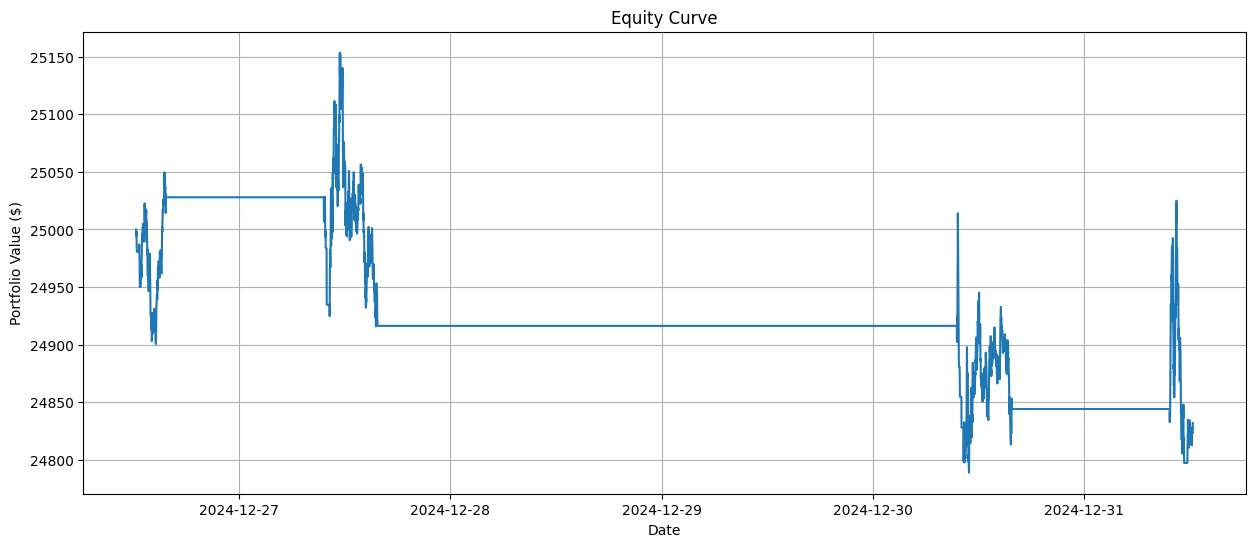


=== Trade Details ===


,entry_time,entry_price,exit_time,exit_price,qty,pnl,duration,return
0,2024-12-26 12:22:00-05:00,456.089996,2024-12-26 12:28:00-05:00,455.165314,21,-19.418335,0 days 00:06:00,-0.001942
1,2024-12-26 12:42:00-05:00,453.570801,2024-12-26 12:47:00-05:00,452.187805,22,-30.425903,0 days 00:05:00,-0.003043
2,2024-12-26 12:53:00-05:00,452.849915,2024-12-26 14:00:00-05:00,451.763794,22,-23.894653,0 days 01:07:00,-0.002389
3,2024-12-26 14:02:00-05:00,452.207794,2024-12-26 14:08:00-05:00,451.160004,22,-23.051392,0 days 00:06:00,-0.002305
4,2024-12-26 14:10:00-05:00,452.202301,2024-12-26 15:46:00-05:00,457.869995,22,124.689270,0 days 01:36:00,0.012469
5,2024-12-27 09:40:00-05:00,444.260010,2024-12-27 09:41:00-05:00,443.299988,22,-21.120483,0 days 00:01:00,-0.002112
6,2024-12-27 09:46:00-05:00,442.600006,2024-12-27 09:53:00-05:00,441.554993,22,-22.990295,0 days 00:07:00,-0.002299
7,2024-12-27 09:58:00-05:00,439.734985,2024-12-27 10:00:00-05:00,437.500000,22,-49.169678,0 days 00:02:00,-0.004917
8,2024-12-27 10:19:00-05:00,429.609985,2024-12-27 15:46:00-05:00,428.813293,23,-18.323914,0 days 05:27:00,-0.001832
9,2024-12-30 09:31:00-05:00,422.640106,2024-12-30 09:45:00-05:00,421.106812,23,-35.265778,0 days 00:14:00,-0.003527



=== Additional Statistics ===
Sharpe Ratio (assuming 0% risk-free rate): -4.85
Max Drawdown: $364.49
Average Trade Duration: 0 days 00:59:41.250000


In [13]:
# Run backtest and analyze results
if data is not None:
    trades_df, equity_df = backtest_strategy(data)
    
    print("=== Backtest Results ===")
    print(f"Number of trades: {len(trades_df)}")
    
    if not trades_df.empty:
        print(f"Total P&L: ${trades_df['pnl'].sum():.2f}")
        print(f"Average P&L per trade: ${trades_df['pnl'].mean():.2f}")
        print(f"Win rate: {(trades_df['pnl'] > 0).mean():.1%}")
        
        # Plot equity curve
        plt.figure(figsize=(15, 6))
        plt.plot(equity_df.index, equity_df['equity'])
        plt.title('Equity Curve')
        plt.xlabel('Date')
        plt.ylabel('Portfolio Value ($)')
        plt.grid(True)
        plt.show()
        
        print("\n=== Trade Details ===")
        display(trades_df[['entry_time', 'entry_price', 'exit_time', 'exit_price', 'qty', 'pnl', 'duration', 'return']])
        
        print("\n=== Additional Statistics ===")
        print(f"Sharpe Ratio (assuming 0% risk-free rate): {(trades_df['return'].mean() / trades_df['return'].std() * np.sqrt(252)):.2f}")
        print(f"Max Drawdown: ${(equity_df['equity'].max() - equity_df['equity'].min()):.2f}")
        print(f"Average Trade Duration: {trades_df['duration'].mean()}")
    else:
        print("No trades were executed during the backtest period")
else:
    print("No data available for backtesting")

# Algo 2
**Strategy:**
- Between 9:31 AM and 3:45 PM Eastern Time:
  If last minute close > last minute open AND current price > current minute open:
    Buy $10,000 USD worth of COIN.
  Exit Condition:
    Trailing stop of 0.2%.

**Requirements:**
- ib_insync: pip install ib_insync
- TWS or IB Gateway running with API access.
- Proper market data subscriptions.

This code is a template and may require adjustments in production.

In [9]:
def backtest_strategy(data):
    """Backtest the specified trading strategy."""
    position_open = False
    entry_price = None
    position_qty = 0
    cash = 25000  # Initial capital
    trades = []
    equity_curve = []
    trailing_stop_percent = 0.002  # 0.2%

    # Create shifted columns for previous bar comparison
    data = data.copy()
    data['prev_open'] = data['Open'].shift(1)
    data['prev_close'] = data['Close'].shift(1)

    for timestamp, row in data.iloc[1:].iterrows():
        current_price = float(row['Close'])

        if in_trading_window(timestamp):
            if not position_open:
                # Entry condition
                prev_close = float(row['prev_close'])
                prev_open = float(row['prev_open'])
                current_open = float(row['Open'])

                if (prev_close > prev_open) and (current_price > current_open):
                    shares = int(10000 / current_price)
                    if shares > 0:
                        position_open = True
                        entry_price = current_price
                        position_qty = shares
                        trades.append({
                            'entry_time': timestamp,
                            'entry_price': entry_price,
                            'qty': position_qty,
                            'direction': 'long'
                        })
            else:
                # Update trailing stop price
                stop_price = entry_price * (1 - trailing_stop_percent)
                if current_price <= stop_price:
                    # Exit condition
                    pnl = (current_price - entry_price) * position_qty
                    cash += pnl
                    trades[-1].update({
                        'exit_time': timestamp,
                        'exit_price': current_price,
                        'pnl': pnl
                    })
                    position_open = False
                    position_qty = 0
                    entry_price = None

        elif position_open:
            # Exit at the end of the trading window
            pnl = (current_price - entry_price) * position_qty
            cash += pnl
            trades[-1].update({
                'exit_time': timestamp,
                'exit_price': current_price,
                'pnl': pnl
            })
            position_open = False
            position_qty = 0
            entry_price = None

        # Track equity
        current_equity = cash
        if position_open:
            current_equity += (current_price - entry_price) * position_qty
        equity_curve.append((timestamp, current_equity))

    trades_df = pd.DataFrame(trades)
    equity_df = pd.DataFrame(equity_curve, columns=['timestamp', 'equity']).set_index('timestamp')

    if not trades_df.empty:
        trades_df['duration'] = trades_df['exit_time'] - trades_df['entry_time']
        trades_df['return'] = trades_df['pnl'] / 10000

    return trades_df, equity_df


C:\Users\clayb\AppData\Local\Temp\ipykernel_15856\3374611899.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(row['Close'])
C:\Users\clayb\AppData\Local\Temp\ipykernel_15856\3374611899.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prev_close = float(row['prev_close'])
C:\Users\clayb\AppData\Local\Temp\ipykernel_15856\3374611899.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prev_open = float(row['prev_open'])
C:\Users\clayb\AppData\Local\Temp\ipykernel_15856\3374611899.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_open = float(row['Open'])


=== Backtest Results ===
Number of trades: 44
Total P&L: $10.34
Average P&L per trade: $0.24
Win rate: 31.8%


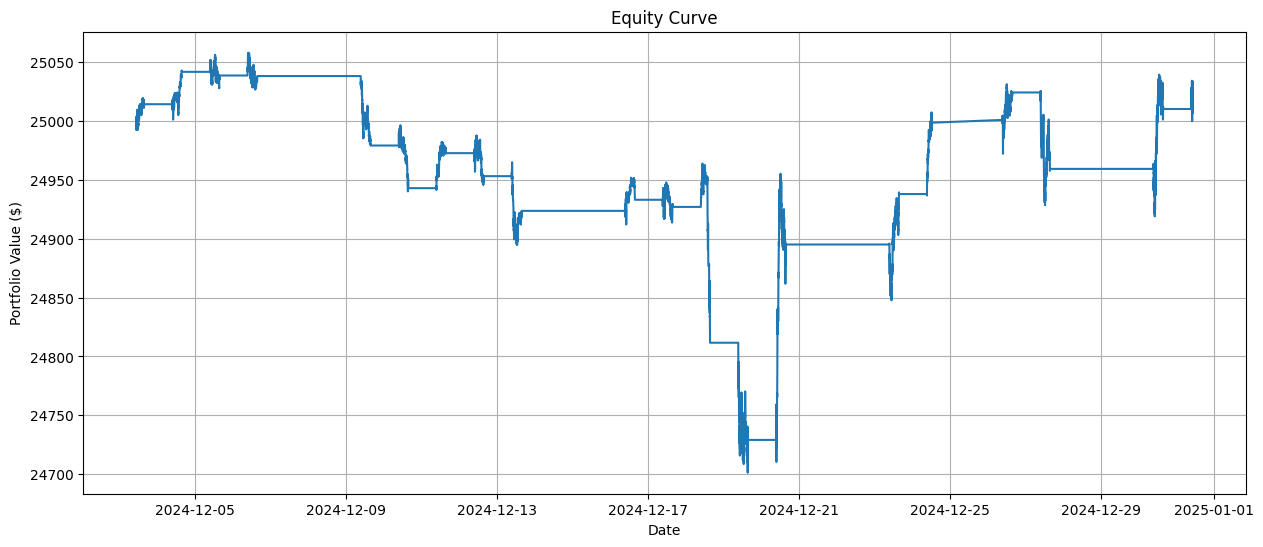


=== Trade Details ===


,entry_time,entry_price,exit_time,exit_price,qty,pnl,duration,return
0,2024-12-03 10:39:00-05:00,602.890015,2024-12-03 15:46:00-05:00,603.789978,16,14.399414,0 days 05:07:00,0.001440
1,2024-12-04 09:36:00-05:00,605.859985,2024-12-04 15:46:00-05:00,607.580017,16,27.520508,0 days 06:10:00,0.002752
2,2024-12-05 09:43:00-05:00,607.544983,2024-12-05 15:46:00-05:00,607.349976,16,-3.120117,0 days 06:03:00,-0.000312
3,2024-12-06 09:31:00-05:00,607.799988,2024-12-06 15:46:00-05:00,607.770020,16,-0.479492,0 days 06:15:00,-0.000048
4,2024-12-09 09:32:00-05:00,607.820007,2024-12-09 10:26:00-05:00,606.530029,16,-20.639648,0 days 00:54:00,-0.002064
5,2024-12-09 10:30:00-05:00,606.580017,2024-12-09 10:48:00-05:00,605.359924,16,-19.521484,0 days 00:18:00,-0.001952
6,2024-12-09 10:54:00-05:00,605.469971,2024-12-09 15:46:00-05:00,604.289978,16,-18.879883,0 days 04:52:00,-0.001888
7,2024-12-10 09:42:00-05:00,604.540100,2024-12-10 15:07:00-05:00,603.304993,16,-19.761719,0 days 05:25:00,-0.001976
8,2024-12-10 15:09:00-05:00,603.419983,2024-12-10 15:46:00-05:00,602.390015,16,-16.479492,0 days 00:37:00,-0.001648
9,2024-12-11 09:32:00-05:00,605.929993,2024-12-11 15:46:00-05:00,607.789978,16,29.759766,0 days 06:14:00,0.002976



=== Additional Statistics ===
Sharpe Ratio (assuming 0% risk-free rate): 0.10
Max Drawdown: $356.98
Average Trade Duration: 0 days 03:36:04.186046511


In [10]:
# Run backtest and analyze results
if data is not None:
    trades_df, equity_df = backtest_strategy(data)
    print("=== Backtest Results ===")
    print(f"Number of trades: {len(trades_df)}")
    
    if not trades_df.empty:
        print(f"Total P&L: ${trades_df['pnl'].sum():.2f}")
        print(f"Average P&L per trade: ${trades_df['pnl'].mean():.2f}")
        print(f"Win rate: {(trades_df['pnl'] > 0).mean():.1%}")
        
        # Plot equity curve
        plt.figure(figsize=(15, 6))
        plt.plot(equity_df.index, equity_df['equity'])
        plt.title('Equity Curve')
        plt.xlabel('Date')
        plt.ylabel('Portfolio Value ($)')
        plt.grid(True)
        plt.show()
        
        print("\n=== Trade Details ===")
        display(trades_df[['entry_time', 'entry_price', 'exit_time', 'exit_price', 'qty', 'pnl', 'duration', 'return']])
        
        print("\n=== Additional Statistics ===")
        print(f"Sharpe Ratio (assuming 0% risk-free rate): {(trades_df['return'].mean() / trades_df['return'].std() * np.sqrt(252)):.2f}")
        print(f"Max Drawdown: ${(equity_df['equity'].max() - equity_df['equity'].min()):.2f}")
        print(f"Average Trade Duration: {trades_df['duration'].mean()}")
    else:
        print("No trades were executed during the backtest period")
else:
    print("No data available for backtesting")

# Algo 2.1

In [35]:
def backtest_strategy(data):
    """Backtest the specified trading strategy."""
    position_open = False
    entry_price = None
    position_qty = 0
    cash = 25000  # Initial capital
    trades = []
    equity_curve = []
    trailing_stop_percent = 0.002  # 0.2%

    # Create shifted columns for previous bar comparison
    data = data.copy()
    data['prev_open'] = data['Open'].shift(1)
    data['prev_close'] = data['Close'].shift(1)

    for timestamp, row in data.iloc[1:].iterrows():
        current_price = float(row['Close'])

        if in_trading_window(timestamp):
            if not position_open:
                # Entry condition
                prev_close = float(row['prev_close'])
                prev_open = float(row['prev_open'])
                current_open = float(row['Open'])

                if (prev_close > prev_open) and (current_price > current_open):
                    shares = int(10000 / current_price)
                    if shares > 0:
                        position_open = True
                        entry_price = current_price
                        position_qty = shares
                        trades.append({
                            'entry_time': timestamp,
                            'entry_price': entry_price,
                            'qty': position_qty,
                            'direction': 'long'
                        })
            else:
                # Update trailing stop price
                stop_price = entry_price * (1 - trailing_stop_percent)
                if current_price <= stop_price:
                    # Exit condition
                    pnl = (current_price - entry_price) * position_qty
                    cash += pnl
                    trades[-1].update({
                        'exit_time': timestamp,
                        'exit_price': current_price,
                        'pnl': pnl
                    })
                    position_open = False
                    position_qty = 0
                    entry_price = None

        elif position_open:
            # Exit at the end of the trading window
            pnl = (current_price - entry_price) * position_qty
            cash += pnl
            trades[-1].update({
                'exit_time': timestamp,
                'exit_price': current_price,
                'pnl': pnl
            })
            position_open = False
            position_qty = 0
            entry_price = None

        # Track equity
        current_equity = cash
        if position_open:
            current_equity += (current_price - entry_price) * position_qty
        equity_curve.append((timestamp, current_equity))

    trades_df = pd.DataFrame(trades)
    equity_df = pd.DataFrame(equity_curve, columns=['timestamp', 'equity']).set_index('timestamp')

    if not trades_df.empty:
        trades_df['duration'] = trades_df['exit_time'] - trades_df['entry_time']
        trades_df['return'] = trades_df['pnl'] / 10000

    return trades_df, equity_df


C:\Users\clayb\AppData\Local\Temp\ipykernel_28496\3374611899.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(row['Close'])
C:\Users\clayb\AppData\Local\Temp\ipykernel_28496\3374611899.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prev_close = float(row['prev_close'])
C:\Users\clayb\AppData\Local\Temp\ipykernel_28496\3374611899.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prev_open = float(row['prev_open'])
C:\Users\clayb\AppData\Local\Temp\ipykernel_28496\3374611899.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_open = float(row['Open'])


=== Backtest Results ===
Number of trades: 40
Total P&L: $-177.08
Average P&L per trade: $-4.43
Win rate: 35.0%


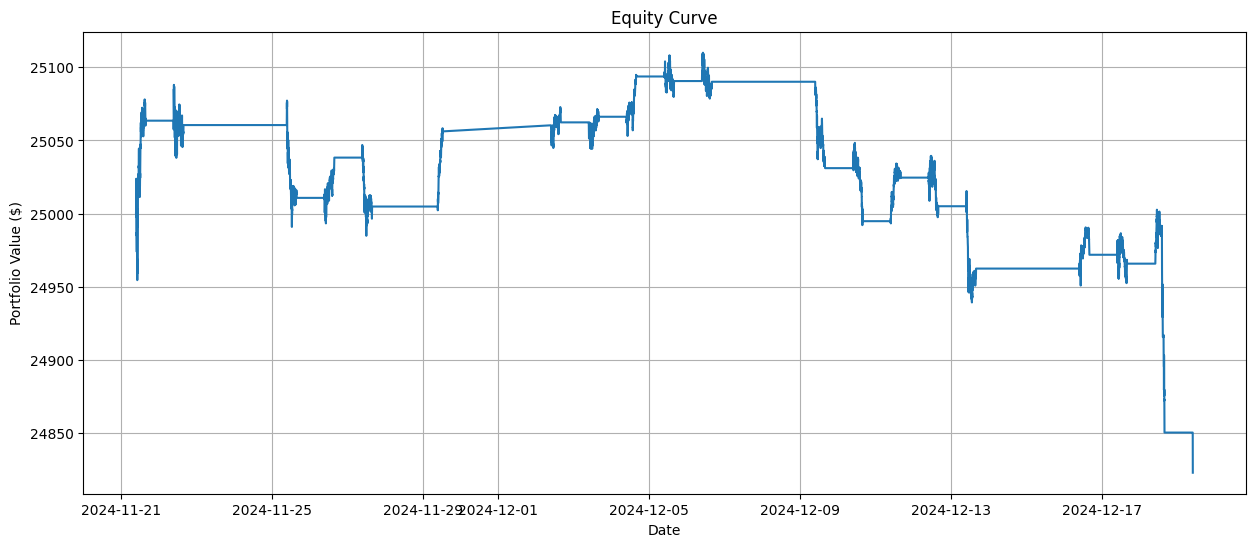


=== Trade Details ===


,entry_time,entry_price,exit_time,exit_price,qty,pnl,duration,return
0,2024-11-21 09:44:00-05:00,589.869995,2024-11-21 10:07:00-05:00,588.450012,16,-22.719727,0 days 00:23:00,-0.002272
1,2024-11-21 10:09:00-05:00,589.159973,2024-11-21 10:29:00-05:00,587.739197,16,-22.732422,0 days 00:20:00,-0.002273
2,2024-11-21 10:32:00-05:00,587.799988,2024-11-21 15:46:00-05:00,594.210022,17,108.970581,0 days 05:14:00,0.010897
3,2024-11-22 09:34:00-05:00,594.510010,2024-11-22 10:28:00-05:00,593.312500,16,-19.160156,0 days 00:54:00,-0.001916
4,2024-11-22 10:30:00-05:00,594.180115,2024-11-22 15:46:00-05:00,595.190002,16,16.158203,0 days 05:16:00,0.001616
5,2024-11-25 09:32:00-05:00,599.690002,2024-11-25 10:11:00-05:00,598.049988,16,-26.240234,0 days 00:39:00,-0.002624
6,2024-11-25 10:15:00-05:00,598.229980,2024-11-25 12:12:00-05:00,596.809998,16,-22.719727,0 days 01:57:00,-0.002272
7,2024-11-25 12:19:00-05:00,596.549988,2024-11-25 12:46:00-05:00,595.260010,16,-20.639648,0 days 00:27:00,-0.002064
8,2024-11-25 12:48:00-05:00,595.770020,2024-11-25 15:46:00-05:00,597.010010,16,19.839844,0 days 02:58:00,0.001984
9,2024-11-26 09:31:00-05:00,599.200012,2024-11-26 15:46:00-05:00,600.919983,16,27.519531,0 days 06:15:00,0.002752



=== Additional Statistics ===
Sharpe Ratio (assuming 0% risk-free rate): -2.56
Max Drawdown: $287.04
Average Trade Duration: 0 days 04:31:00


In [36]:
# Assuming 'data' is your DataFrame with historical minute-level data
if data is not None:
    trades_df, equity_df = backtest_strategy(data)

    print("=== Backtest Results ===")
    print(f"Number of trades: {len(trades_df)}")

    if not trades_df.empty:
        print(f"Total P&L: ${trades_df['pnl'].sum():.2f}")
        print(f"Average P&L per trade: ${trades_df['pnl'].mean():.2f}")
        print(f"Win rate: {(trades_df['pnl'] > 0).mean():.1%}")

        # Plot equity curve
        plt.figure(figsize=(15, 6))
        plt.plot(equity_df.index, equity_df['equity'])
        plt.title('Equity Curve')
        plt.xlabel('Date')
        plt.ylabel('Portfolio Value ($)')
        plt.grid(True)
        plt.show()

        print("\n=== Trade Details ===")
        display(trades_df[['entry_time', 'entry_price', 'exit_time', 'exit_price', 'qty', 'pnl', 'duration', 'return']])

        print("\n=== Additional Statistics ===")
        print(f"Sharpe Ratio (assuming 0% risk-free rate): {(trades_df['return'].mean() / trades_df['return'].std() * np.sqrt(252)):.2f}")
        max_drawdown = (equity_df['equity'].cummax() - equity_df['equity']).max()
        print(f"Max Drawdown: ${max_drawdown:.2f}")
        print(f"Average Trade Duration: {trades_df['duration'].mean()}")
    else:
        print("No trades were executed during the backtest period")
else:
    print("No data available for backtesting")
